**League of Legends Jungler Analysis**

**By Jonathan Wang**

**Overview**

League of Legends is one of the world's most popular games, with over 80 million unique monthly players. Released in 2009 by Riot Games, it allows 10 players to compete in 5v5 strategic battle with a plethora of iconic characters, strategies, and maps.

League of Legends takes place on the symmetrical map Summoner's Rift, where two teams aim to destroy the opposing team's Nexus, or base. The map features a vast jungle and three "lanes", where players meet their opposing counterparts and kill their minions for gold, vanquish their champions (characters), and destroy their Towers, which defend the Nexus. Each of the lanes features a specific role.

The Top lane is typically occupied by a lone durable champion designed to soak damage for his team (Tank), the Mid lane is home to magic type champions who specialize in dealing enormous amounts of damage to opponents very quickly (Assassin), and the Bot lane holds a fragile but deadly archer champion (Marksman) and a supporting, healing-type champion (Support).

With four clearly delineated roles and three lanes, League of Legends seems like a simple and straightforward game. However, each game of League of Legends features a fifth mysterious, x-factor role: the Jungler. The Jungler does not occupy any of the three aforementioned lanes, instead opting to slay the monsters that occupy the map's jungle to gain experience, roam around the map securing objectives, and ambushing unsuspecting enemies in their lanes to aid his teammates. The Jungler is a very flexible role, as popular Jungle champions range from Assassins to Marksmen.

A superior Jungler knows the most efficient path to take to kill monsters in the Jungle, applies suffocating pressure across the map by constantly ambushing enemies, and proactively secures important objectives such as Towers and Epic Monsters, which grant team-wide gold and benefits. Junglers have an enormous impact upon games, being able to single-handedly influence a game's outcome.

League of Legends features a ranking system very similar to Chess ELO, with different Tiers representing skill. In this analysis, we will use the Riot Games API, Python, Pandas, and Matplotlib to look at Junglers (players who have over 50% of their games played as the Jungler) from varying tiers to analyze what makes a jungler successful.

**Introduction**

We begin by importing the Riot Games API through open source library Cassiopeia and setting the developer key and region. Pandas and Matplotlib are also imported.

In [1]:
import cassiopeia as cass
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random
from IPython.display import display, HTML
key = "RGAPI-3cd61dfb-efdb-41d5-917f-60322c5495de"
cass.set_riot_api_key(key)
cass.set_default_region("NA")

**Statistics**

The Riot API conveniently includes access to the top 200 players in the highest Tier, Challenger Tier. We begin by analyzing matches from players in this Tier.

Functions **individualStats** and **isJungler** pull the statistics of the 10 individual players in a given match and identifies whether a player is the Jungler, respectively.

In [2]:
def isJungler(participant):
    if participant.summoner_spell_d.name == "Smite" or participant.summoner_spell_f.name == "Smite":
        return True
    else:
        return False

In [3]:
# Pull the players, champions, and roles from a specific game

def individualStats(blueTeamParticipants, redTeamParticipants):
    # Dictionary and DataFrame for later use
    data = {'Player':[],
           'Champion':[],
           'Jungler':[],
           'Kills':[],
           'Deaths':[],
           'Assists':[],
           'Towers Destroyed':[],
           'Damage to Objectives':[],
           'Team':[]}
    
    
    # Read in the blue team and red team
    
    for participant in blueTeamParticipants:
        data['Player'].append(participant.summoner.name)
        data['Champion'].append(participant.champion.name)
        data['Jungler'].append(isJungler(participant))
        data['Kills'].append(participant.stats.kills)
        data['Deaths'].append(participant.stats.deaths)
        data['Assists'].append(participant.stats.assists)
        data['Towers Destroyed'].append(participant.stats.turret_kills)
        data['Damage to Objectives'].append(participant.stats.damage_dealt_to_objectives)
        data['Team'].append('BLUE')
 
        
    # Set to DataFrame, index, rearrange columns
    blueStats = pd.DataFrame(data)
    blueStats = blueStats.set_index('Player')
    blueStats = blueStats[['Champion', 'Jungler', 'Kills', 'Deaths', 'Assists', 'Towers Destroyed', 'Damage to Objectives', 'Team']]
    print()
    
    data = {'Player':[],
           'Champion':[],
           'Jungler':[],
           'Kills':[],
           'Deaths':[],
           'Assists':[],
           'Towers Destroyed':[],
           'Damage to Objectives':[],
           'Team':[]}

    for participant in redTeamParticipants:
        data['Player'].append(participant.summoner.name)
        data['Champion'].append(participant.champion.name)
        data['Jungler'].append(isJungler(participant))
        data['Kills'].append(participant.stats.kills)
        data['Deaths'].append(participant.stats.deaths)
        data['Assists'].append(participant.stats.assists)
        data['Towers Destroyed'].append(participant.stats.turret_kills)
        data['Damage to Objectives'].append(participant.stats.damage_dealt_to_objectives)
        data['Team'].append('RED')
        
    print()
    redStats = pd.DataFrame(data)
    redStats = redStats.set_index('Player')
    redStats = redStats[['Champion', 'Jungler', 'Kills', 'Deaths', 'Assists', 'Towers Destroyed', 'Damage to Objectives', 'Team']]
    allStats = blueStats.append(redStats)
    return allStats

These functions compile the correlation between taking first objectives and victory.

In [4]:
def firstTurretWin(match, turretVictory):
    if match.blue_team.first_tower:
        turretVictory['First Turret Taken'].append(True)
        turretVictory['Victory'].append(match.blue_team.win)
    elif match.red_team.first_tower:
        turretVictory['First Turret Taken'].append(True)
        turretVictory['Victory'].append(match.red_team.win)
    else: # If turret isn't taken
        turretVictory['First Turret Taken'].append(False)
        turretVictory['Victory'].append('N/A')

In [5]:
def firstDragonWin(match, dragonVictory):
    if match.blue_team.first_dragon:
        dragonVictory['First Dragon Taken'].append(True)
        dragonVictory['Victory'].append(match.blue_team.win)
    elif match.red_team.first_dragon:
        dragonVictory['First Dragon Taken'].append(True)
        dragonVictory['Victory'].append(match.red_team.win)
    else: # If Dragon isn't taken
        dragonVictory['First Dragon Taken'].append(False)
        dragonVictory['Victory'].append('N/A')

In [6]:
def firstBaronWin(match, baronVictory):
    if match.blue_team.first_baron:
        baronVictory['First Baron Taken'].append(True)
        baronVictory['Victory'].append(match.blue_team.win)
    elif match.red_team.first_baron:
        baronVictory['First Baron Taken'].append(True)
        baronVictory['Victory'].append(match.red_team.win)
    else: # First Baron isn't tkaen
        baronVictory['First Baron Taken'].append(False)
        baronVictory['Victory'].append('N/A')

**Team Analysis**

In [7]:
def teamStats(match):
    # Analyse stats for each team
    print("Blue Team stats")
    print("Won:", match.blue_team.win)
    print("Dragons Killed:", match.blue_team.dragon_kills)
    print("Towers Destroyed:", match.blue_team.tower_kills)

    print()
    # Red team

    print("Red Team stats")
    print("Won:", match.red_team.win)
    print("Dragons Killed:", match.red_team.dragon_kills)
    print("Towers Destroyed:", match.red_team.tower_kills)
    
    print()

Let's now use this function to pull 3 random matches from the first 3 players in Challenger tier.

In [8]:
print("CHALLENGER TIER")

challenger_players = cass.get_challenger_league(queue=cass.Queue.ranked_solo_fives)
challenger_players = [player.summoner for player in challenger_players]

turretVictory = {'First Turret Taken':[],
                'Victory':[]}

dragonVictory = {'First Dragon Taken':[],
                'Victory':[]}

baronVictory = {'First Baron Taken':[],
               'Victory':[]}

# Pull first match for example

count = 1
for player in range(0, 29):
    currentMatch = challenger_players[player].match_history[random.randint(0, 10)] # Pull random match from the top 30 players
    if currentMatch.mode.name == 'classic':    # Only look at ranked, classic games
        print("Rank", count, "Challenger player is", challenger_players[player].name)
        if count == 1: # Display the first match
            display(individualStats(currentMatch.blue_team.participants, currentMatch.red_team.participants))
        else: # Otherwise just iterate
            individualStats(currentMatch.blue_team.participants, currentMatch.red_team.participants) # Display individual player stats
        print(teamStats(currentMatch)) # Print team stats
        firstTurretWin(currentMatch, turretVictory) # Correlation between first turret and win
        firstDragonWin(currentMatch, dragonVictory) # Correlation between first dragon and win
        firstBaronWin(currentMatch, baronVictory) # Correlation between firs
        count += 1

turretVictory = pd.DataFrame(turretVictory)
display(turretVictory)

dragonVictory = pd.DataFrame(dragonVictory)
display(dragonVictory)

baronVictory = pd.DataFrame(baronVictory)
display(baronVictory)

CHALLENGER TIER
Making call: https://na1.api.riotgames.com/lol/league/v3/challengerleagues/by-queue/RANKED_SOLO_5x5
Making call: https://na1.api.riotgames.com/lol/summoner/v3/summoners/51580106
Making call: https://na1.api.riotgames.com/lol/match/v3/matchlists/by-account/214201438?beginIndex=0&endIndex=100
Making call: https://ddragon.leagueoflegends.com/realms/na.json
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2765169815
Rank 1 Challenger player is 1Self
Making call: https://ddragon.leagueoflegends.com/cdn/8.7.1/data/en_US/championFull.json
Making call: https://ddragon.leagueoflegends.com/cdn/8.7.1/data/en_US/summoner.json




,Champion,Jungler,Kills,Deaths,Assists,Towers Destroyed,Damage to Objectives,Team
Player,,,,,,,,
9k jg,Olaf,True,4,5,1,0,7396,BLUE
1Self,Kai'Sa,False,3,3,2,0,1652,BLUE
Sheepp,Karthus,False,1,2,4,0,0,BLUE
BULLY HUNTER21,Ornn,False,1,3,0,0,812,BLUE
lron Pyrite,Alistar,False,0,4,6,0,0,BLUE
Vchee,Kayn,True,5,1,9,0,2753,RED
Macotoˉ,Orianna,False,2,3,9,1,5743,RED
INF SolidSnake,Thresh,False,2,3,8,0,1177,RED
eLLi nOISE,Fiora,False,1,0,5,1,3875,RED


Blue Team stats
Won: False
Dragons Killed: 1
Towers Destroyed: 0

Red Team stats
Won: True
Dragons Killed: 0
Towers Destroyed: 3

None
Making call: https://na1.api.riotgames.com/lol/summoner/v3/summoners/20156599
Making call: https://na1.api.riotgames.com/lol/match/v3/matchlists/by-account/33005538?beginIndex=0&endIndex=100
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2764722155
Rank 2 Challenger player is Carmen Campagne


Blue Team stats
Won: True
Dragons Killed: 0
Towers Destroyed: 4

Red Team stats
Won: False
Dragons Killed: 1
Towers Destroyed: 1

None
Making call: https://na1.api.riotgames.com/lol/summoner/v3/summoners/79249642
Making call: https://na1.api.riotgames.com/lol/match/v3/matchlists/by-account/234595021?beginIndex=0&endIndex=100
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2763568814
Rank 3 Challenger player is twtv PeridotLoL


Blue Team stats
Won: True
Dragons Killed: 0
Towers Destroyed: 9

Red Team stats
Won: False
Dragons Killed

,First Turret Taken,Victory
0,True,True
1,True,False
2,True,True
3,True,True
4,True,True
5,True,False
6,True,True
7,True,False
8,True,False
9,True,False


,First Dragon Taken,Victory
0,True,False
1,True,False
2,True,False
3,True,True
4,True,True
5,True,True
6,True,False
7,True,False
8,True,True
9,True,False


,First Baron Taken,Victory
0,True,True
1,False,N/A
2,False,N/A
3,True,True
4,True,True
5,False,N/A
6,True,True
7,False,N/A
8,True,True
9,True,True


Find ratio of First turret/dragon/baron to victory

In [9]:
tv = turretVictory[list(turretVictory)[1]].value_counts()
dv = dragonVictory[list(dragonVictory)[1]].value_counts()
bv = baronVictory[list(baronVictory)[1]].value_counts()

display(tv)
display(dv)
display(bv)

True     21
False     7
Name: Victory, dtype: int64

True     15
False    12
N/A       1
Name: Victory, dtype: int64

True     16
N/A      10
False     2
Name: Victory, dtype: int64

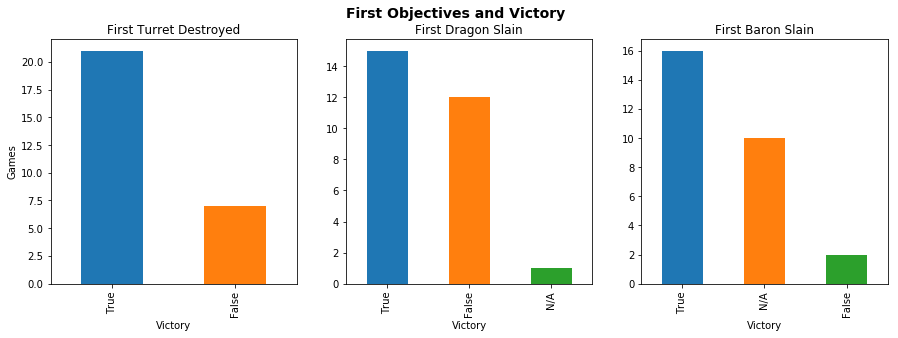

In [10]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15,4.5)) 
tv.plot(ax = ax[0], kind = 'bar')
dv.plot(ax = ax[1], kind = 'bar')
bv.plot(ax = ax[2], kind = 'bar')

ax[0].set_title("First Turret Destroyed")
ax[1].set_title("First Dragon Slain")
ax[2].set_title("First Baron Slain")

ax[0].set_ylabel("Games")

for var in ax:
    var.set_xlabel("Victory")

fig.suptitle("First Objectives and Victory", fontsize = 14, fontweight = "bold")

# There is a positive correlation between all three of these factors. 

Destroying the first tower not only indicates that a team's players have outmaneuvered and outplayed their opponents, but also rewards the destroying team a large sum of gold which can be used to purchase more powerful equipment to further press their lead. This can be seen in the above graph, where in **75%** of games where the first tower was taken, a victory was secured.

Killing the first Dragon gives a small permanent boost in team power, ranging from increased sieging power to augmented movement speed. Benefits multiply after the first boost, so taking the first Dragon is important to start the multiplicative effect. However, while the boost is certainly beneficial, it varies and is determined by a random number generator, so it may not always fit what the team needs at the time. This explains the weakened correlation between the two, where victory was secured in only **55.56%** of games where the first Dragon was slain.

Killing the first Baron grants massively augmented combat and sieging power. While the boost is only temporary, it is enough to cause significant damage to an enemy's base and team members and often end the game outright. This can be seen in the incredibly strong correlation between first Baron slain and victory, with **88.89%** first Baron games resulting in victory.